In [2]:
import pandas as pd

In [42]:
diabetes=pd.read_csv('pima-indians-diabetes.csv')

In [43]:
diabetes.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
#col_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [7]:
#diabetes[col_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [8]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
number_perg=tf.feature_column.numeric_column('Number_pregnant')
glu_con=tf.feature_column.numeric_column('Glucose_concentration')
blood_pre=tf.feature_column.numeric_column('Blood_pressure')
triceps=tf.feature_column.numeric_column('Triceps')
insulin=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
pedigree=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column('Age')
group=tf.feature_column.numeric_column('Group')


In [11]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [18]:
#assigned_group=tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [12]:
import matplotlib.pyplot as plt

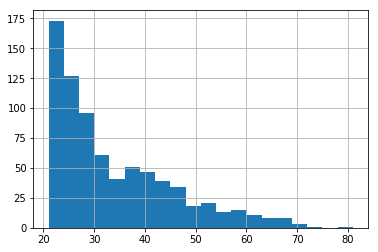

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70])

In [15]:
feat_cols=[number_perg,glu_con,blood_pre,triceps,insulin,bmi,pedigree,age_bucket]

In [28]:
X_data=diabetes.drop('Class',axis=1)

In [29]:
X_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [30]:
lables=diabetes['Class']

In [31]:
lables

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,lables,test_size=0.33, random_state=101)

In [38]:
input_function=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [18]:
#X_train,x_test,Y_train,y_test=train_test_split(X_data,lables,test_size=0.5,random_state=101)

In [19]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\STEALE~1\\AppData\\Local\\Temp\\tmpt832vwyc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025D7B17E400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
model.train(input_fn=input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\STEALE~1\AppData\Local\Temp\tmpt832vwyc\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 365.808
INFO:tensorflow:loss = 5.3601093, step = 101 (0.273 sec)
INFO:tensorflow:global_step/sec: 645.392
INFO:tensorflow:loss = 4.700754, step = 201 (0.155 sec)
INFO:tensorflow:global_step/sec: 576.576
INFO:tensorflow:loss = 7.5370464, step = 301 (0.173 sec)
INFO:tensorflow:global_step/sec: 591.65
INFO:tensorflow:loss = 4.954913, step = 401 (0.169 sec)
INFO:tensorflow:global_step/sec: 607.808
INFO:tensorflow:loss = 3.608615, step = 501 (0.165 sec)
INFO:tensorflow:global_step/sec: 511.883
INFO:tensorflow:loss = 4.321851, step = 601 (0.198 sec)
INFO:tensorflow:global_step/sec

In [21]:
eval_input_function=tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [30]:
result=model.evaluate(input_fn=eval_input_function)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-29-07:22:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmpt832vwyc\model.ckpt-1078
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-29-07:22:51
INFO:tensorflow:Saving dict for global step 1078: accuracy = 0.7369792, accuracy_baseline = 0.6640625, auc = 0.77470744, auc_precision_recall = 0.62270224, average_loss = 0.53343767, global_step = 1078, label/mean = 0.3359375, loss = 5.2523093, precision = 0.6372549, prediction/mean = 0.34810674, recall = 0.503876
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1078: C:\Users\STEALE~1\AppData\Local\Temp\tmpt832vwyc\model.ckpt-1078


In [31]:
result

{'accuracy': 0.7369792,
 'accuracy_baseline': 0.6640625,
 'auc': 0.77470744,
 'auc_precision_recall': 0.62270224,
 'average_loss': 0.53343767,
 'label/mean': 0.3359375,
 'loss': 5.2523093,
 'precision': 0.6372549,
 'prediction/mean': 0.34810674,
 'recall': 0.503876,
 'global_step': 1078}

In [32]:
pred_funtion=tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [37]:
predictions=model.predict(pred_funtion)

In [38]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmpt832vwyc\model.ckpt-1078
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.11745822], dtype=float32),
  'logistic': array([0.52933085], dtype=float32),
  'probabilities': array([0.47066918, 0.52933085], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.5836159], dtype=float32),
  'logistic': array([0.641899], dtype=float32),
  'probabilities': array([0.35810098, 0.641899  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.46375316], dtype=float32),
  'logistic': array([0.38609585], dtype=float32),
  'probabilities': array([0.6139042 , 0.38609585], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.8285429], dtype=float32),
  'logistic': array([0.30395326], dtype=float32),
  'probabilities': array([0.69604677, 0.30395326], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits'

In [22]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\STEALE~1\\AppData\\Local\\Temp\\tmp5k7vndq3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020566374470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
embeded_group=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [24]:
feat_cols=[number_perg,glu_con,blood_pre,triceps,insulin,bmi,pedigree,embeded_group,age_bucket]

In [25]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\STEALE~1\\AppData\\Local\\Temp\\tmphkdhsgr_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020565DE9E48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
dnn_model.train(input_fn=input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\STEALE~1\AppData\Local\Temp\tmphkdhsgr_\model.ckpt.
INFO:tensorflow:loss = 6.542451, step = 1
INFO:tensorflow:global_step/sec: 342.169
INFO:tensorflow:loss = 4.7381353, step = 101 (0.295 sec)
INFO:tensorflow:global_step/sec: 586.258
INFO:tensorflow:loss = 4.5267315, step = 201 (0.168 sec)
INFO:tensorflow:global_step/sec: 564.355
INFO:tensorflow:loss = 6.1048346, step = 301 (0.177 sec)
INFO:tensorflow:global_step/sec: 573.554
INFO:tensorflow:loss = 6.099414, step = 401 (0.174 sec)
INFO:tensorflow:global_step/sec: 552.884
INFO:tensorflow:loss = 6.8994985, step = 501 (0.181 sec)
INFO:tensorflow:global_step/sec: 597.352
INFO:tensorflow:loss = 4.6737614, step = 601 (0.167 sec)
INFO:tensorflow:global_step

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [41]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-29-07:40:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmphkdhsgr_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-29-07:40:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.68503934, accuracy_baseline = 0.65748036, auc = 0.75696886, auc_precision_recall = 0.5926767, average_loss = 0.5604144, global_step = 1000, label/mean = 0.34251967, loss = 5.4748173, precision = 0.5479452, prediction/mean = 0.33242512, recall = 0.4597701
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\STEALE~1\AppData\Local\Temp\tmphkdhsgr_\model.ckpt-1000


{'accuracy': 0.68503934,
 'accuracy_baseline': 0.65748036,
 'auc': 0.75696886,
 'auc_precision_recall': 0.5926767,
 'average_loss': 0.5604144,
 'label/mean': 0.34251967,
 'loss': 5.4748173,
 'precision': 0.5479452,
 'prediction/mean': 0.33242512,
 'recall': 0.4597701,
 'global_step': 1000}